# New-Car_main

somaire 

    1-L'importation des blibliotech
    
    2-Extration et verification 
    
    3-Data visualisation 
    
    4-Traitement de la donnée 
    
    5-Debut du machine learning 

In [1]:
import pandas as pd

import missingno as msno
import numpy as np
import sklearn.preprocessing as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


fin de l'importation de la blibliotech 

In [56]:
df = pd.read_csv('carData.csv')
df

<bound method NDFrame.head of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1    

In [60]:
savefig(df.head)

NameError: name 'savefig' is not defined

In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
df.isnull().sum() 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

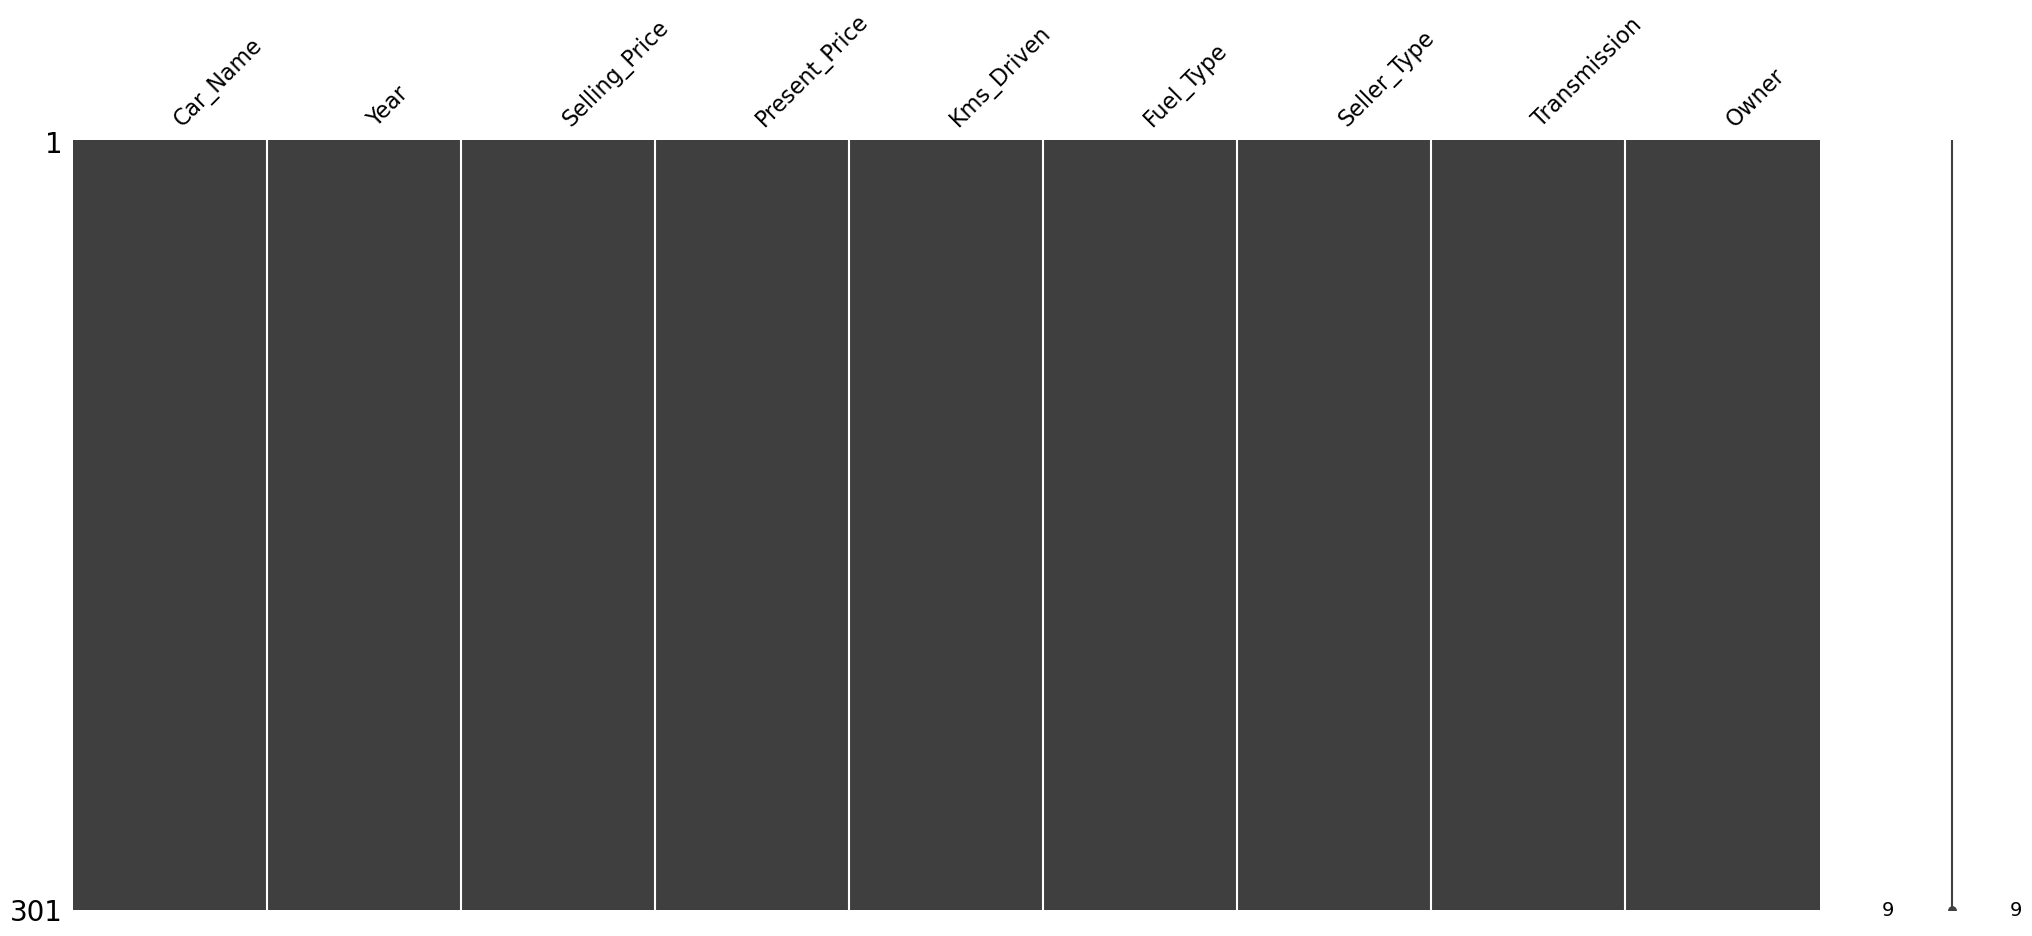

In [5]:
msno.matrix(df)

<AxesSubplot:>

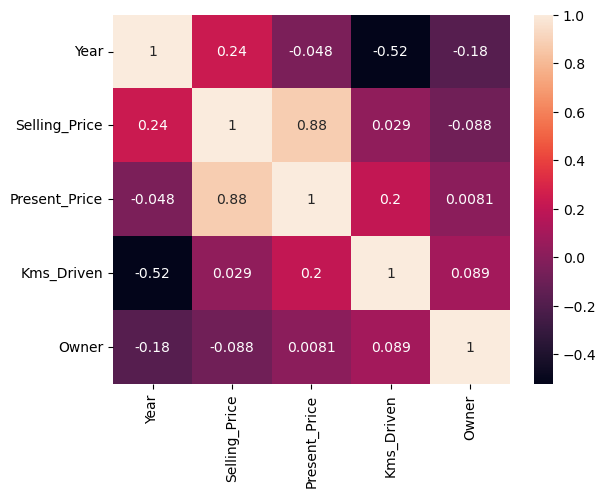

In [6]:
sns.heatmap(df.corr(), annot=True)

On voit que aucune donnée n'est manquante.

## debut de la datavis


Text(0.5, 1.0, 'Si la voiture et avec un propriétaire ')

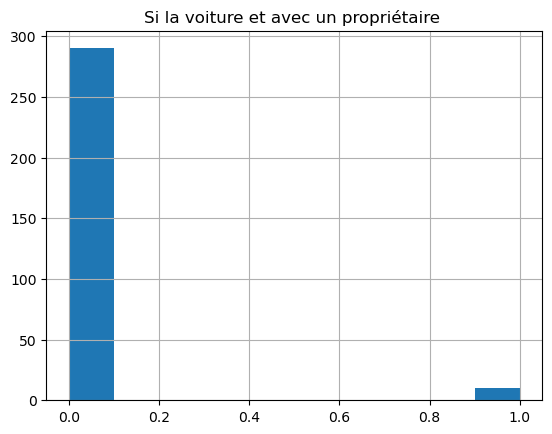

In [8]:
df.Owner.hist()
plt.title("Si la voiture et avec un propriétaire ")

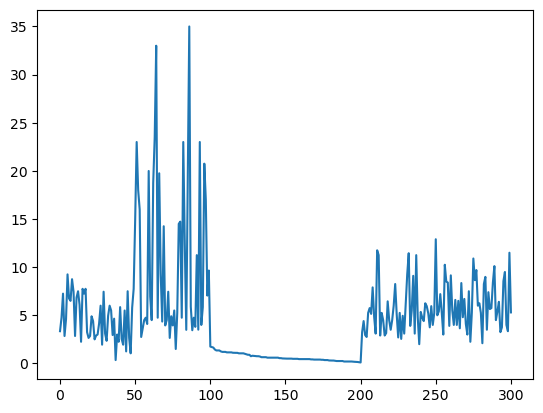

In [9]:
plt.plot(df.Selling_Price)

Text(0.5, 1.0, 'prix de vente par année')

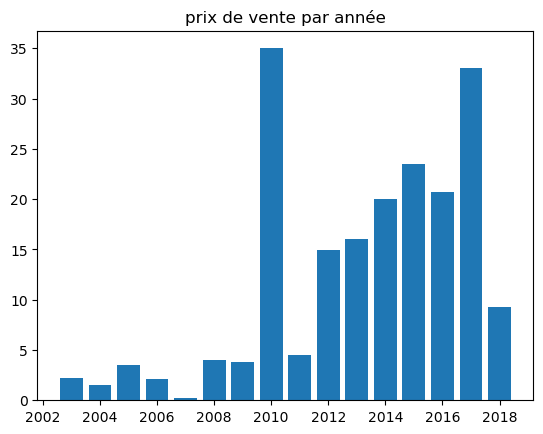

In [10]:
plt.bar(df.Year,df.Selling_Price)
plt.title("prix de vente par année")

Text(0.5, 1.0, 'klm part année')

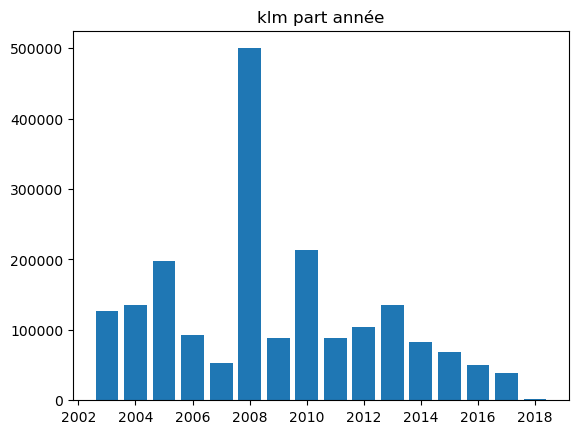

In [11]:
plt.bar(df.Year,df.Kms_Driven)
plt.title("klm part année")

Text(0.5, 1.0, 'comparersont des prix')

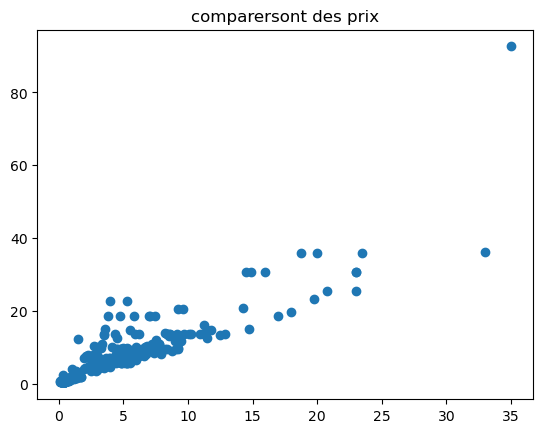

In [12]:
plt.scatter(df.Selling_Price,df.Present_Price)
plt.title("comparersont des prix")

Text(0.5, 1.0, 'prix actuel par anneé')

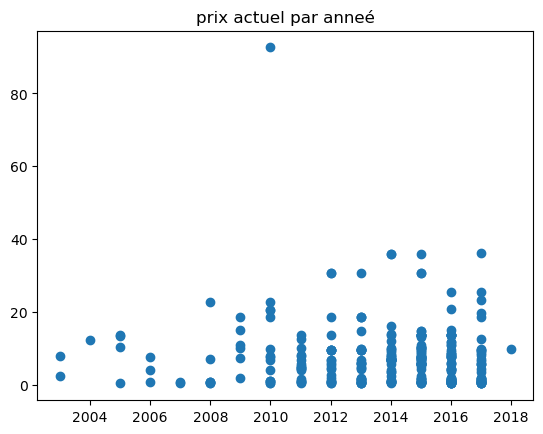

In [13]:
plt.scatter(df.Year,df.Present_Price)
plt.title("prix actuel par anneé")

<function matplotlib.pyplot.show(close=None, block=None)>

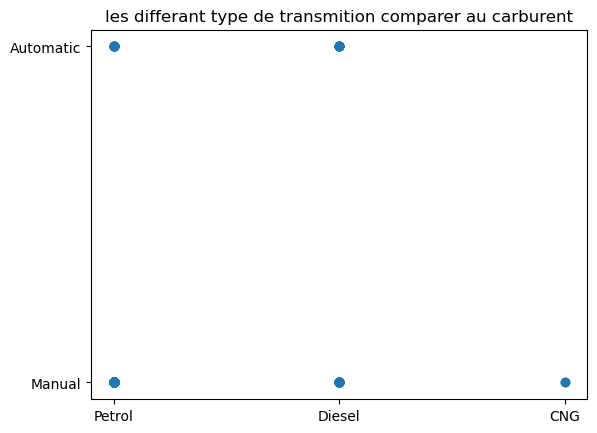

In [62]:
plt.scatter(df.Fuel_Type,df.Transmission)
plt.title("les differant type de transmition comparer au carburent")
plt.show

Text(0.5, 1.0, 'prix de vente part type de trasmition')

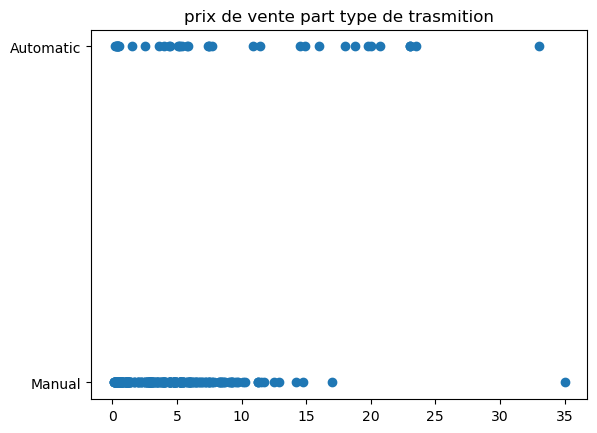

In [65]:
plt.scatter(df.Selling_Price,df.Transmission)
plt.title("prix de vente part type de trasmition")

Text(0.5, 1.0, 'prix de vente comparer si il y a un propriétaire ou pas ')

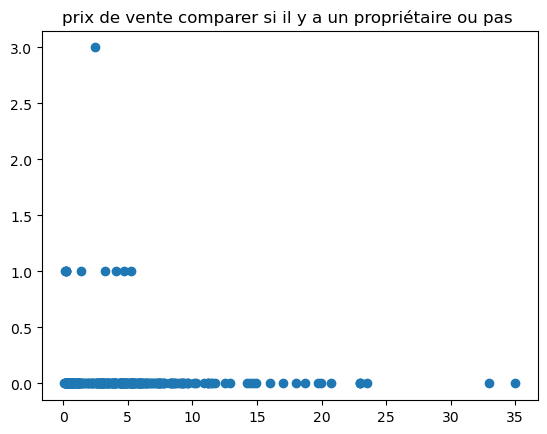

In [67]:
plt.scatter(df.Selling_Price,df.Owner)
plt.title("prix de vente comparer si il y a un propriétaire ou pas ")

Text(0.5, 1.0, 'type de carburent par propriétair')

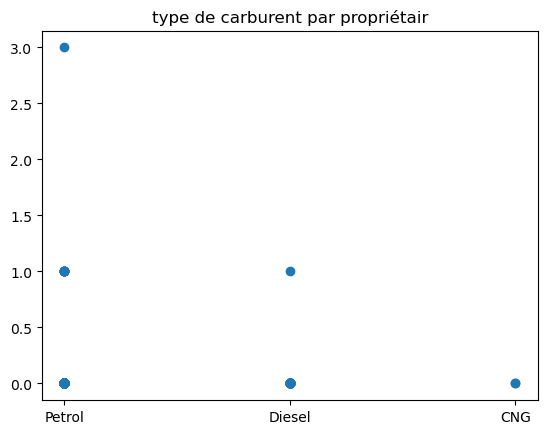

In [68]:
plt.scatter(df.Fuel_Type,df.Owner)
plt.title("type de carburent par propriétair")

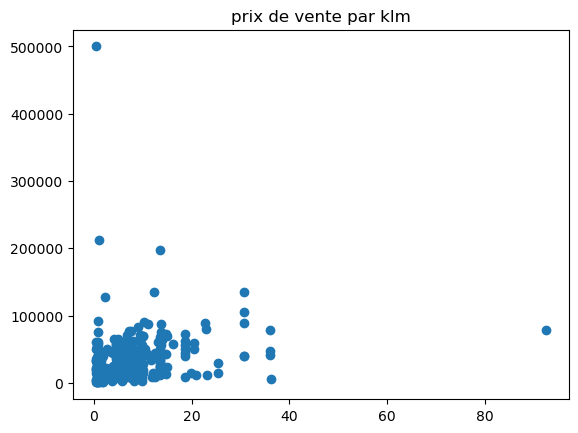

In [20]:
plt.scatter(df.Present_Price,df.Kms_Driven)
plt.title("prix de vente par klm")
plt.show()

Text(0.5, 1.0, 'prix de vente par klm')

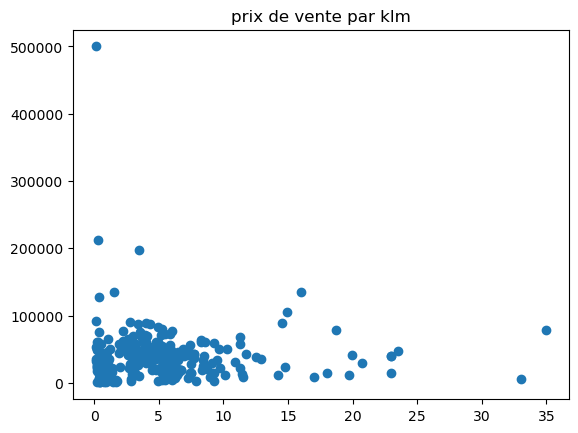

In [21]:
plt.scatter(df.Selling_Price,df.Kms_Driven)
plt.title("prix de vente par klm")

## traitement de la donner

In [7]:
df.drop(df[(df['Owner'] >2) & (df['Owner'] < 4) ].index,inplace=True)

In [22]:
le = sk.LabelEncoder()
le.fit(df.Fuel_Type)
list(le.classes_)
le.transform(["Petrol","Diesel","CNG"])

array([2, 1, 0])

le.fit(df.Transmission)
list(le.classes_)
le.transform(["Automatic","Manual"])

In [23]:
le.fit(df.Seller_Type)
list(le.classes_)
le.transform(["Dealer","Individual"])

array([0, 1])

In [39]:
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,89,11,3.35,5.59,27000,2,0,1,0
1,92,10,4.75,9.54,43000,1,0,1,0
2,67,14,7.25,9.85,6900,2,0,1,0
3,95,8,2.85,4.15,5200,2,0,1,0
4,91,11,4.60,6.87,42450,1,0,1,0


In [40]:
x = df.drop(columns=['Year'])
y = df['Year']
x_car, x_test, y_car, y_test = train_test_split(x, y, test_size=0.30)

## debut du machine learning

Text(0.5, 1.0, 'prix actuel par année')

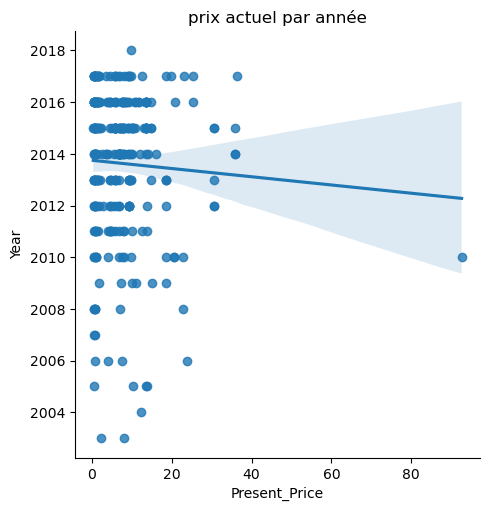

In [72]:
sns.lmplot(x="Present_Price", y="Year", data=df)
plt.title("prix actuel par année")


Text(0.5, 1.0, 'prix de vente par km')

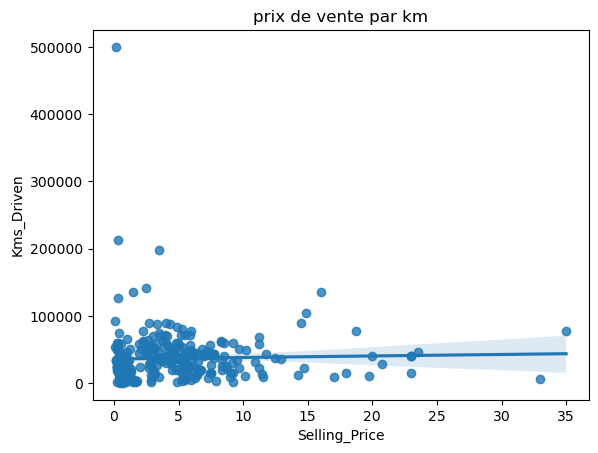

In [74]:
sns.regplot(x="Selling_Price", y="Kms_Driven", data=df)
plt.title("prix de vente par km")

In [48]:
rf_model = LinearRegression()
rf_model.fit(x_car,y_car)

LinearRegression()

In [51]:
y_pred = rf_model.predict(x_test)

In [52]:
mean_squared_error(y_test,y_pred)

7.523236717222251

In [53]:
r2_score(y_test,y_pred)

0.23922325331460392

<function matplotlib.pyplot.legend(*args, **kwargs)>

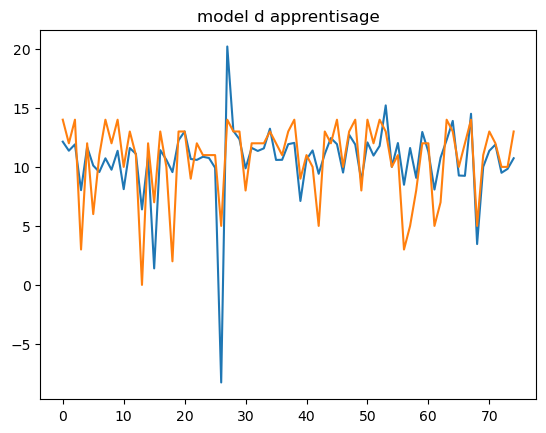

In [61]:
plt.title('model d apprentisage')
plt.plot(list(y_pred)[:75],label='prédiction')
plt.plot(list(y_test)[:75],label='original')
plt.legend